<a href="https://colab.research.google.com/github/akshada-baiwar/OIBSIP-2/blob/main/Task3_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries - pandas, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#matplotlib inline for showing diagram in notebook
%matplotlib inline

In [ ]:
#importing sklearn classes from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
cardata = pd.read_csv('cardata.csv')
cardata.head() 


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cardata.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cardata.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#creating relations
fuel_type = cardata['Fuel_Type']
seller_type = cardata['Seller_Type']
transmission_type = cardata['Transmission']
selling_price = cardata['Selling_Price']


In [ ]:
from matplotlib import style

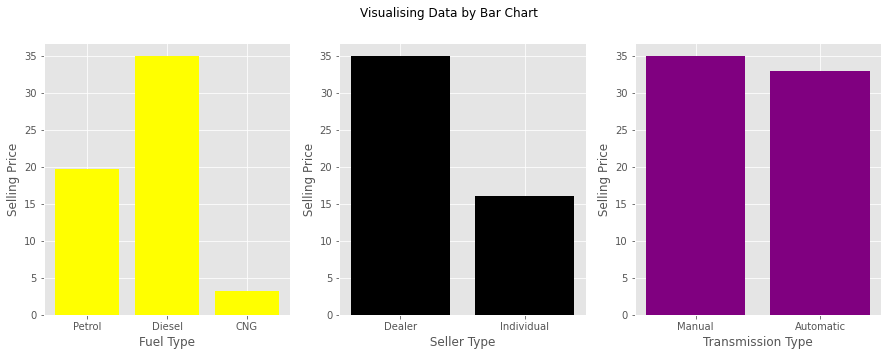

In [ ]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualising Data by Bar Chart')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color = 'yellow')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color= 'black')
plt.xlabel(" Seller Type ")
plt.ylabel(" Selling Price ")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color= 'purple')
plt.xlabel("Transmission Type")
plt.ylabel(" Selling Price ")
plt.show()


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

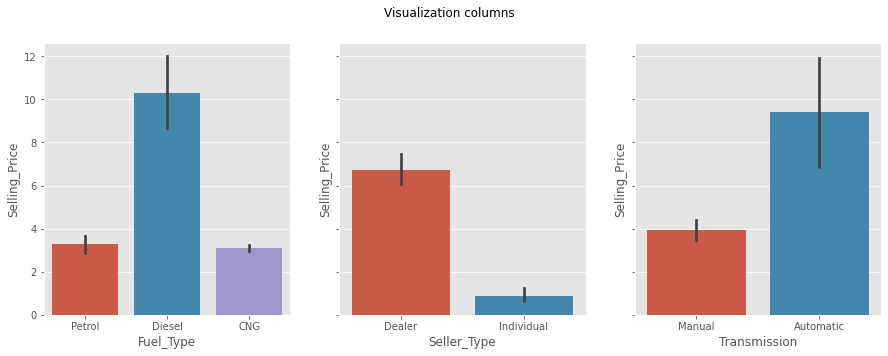

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualization columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x= seller_type, y= selling_price, ax=axes[1])
sns.barplot(x= transmission_type, y= selling_price, ax=axes[2])

In [ ]:
petrol_data = cardata.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [ ]:
seller_data = cardata.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [ ]:
cardata.replace({'Fuel_Type' :{'Petrol': 0, 'Diesel' :1, 'CNG':2}}, inplace=True)
cardata = pd.get_dummies(cardata, columns=['Seller_Type', 'Transmission'], drop_first=True)


In [ ]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


Text(0.5, 1.0, 'Correlation amont the columns')

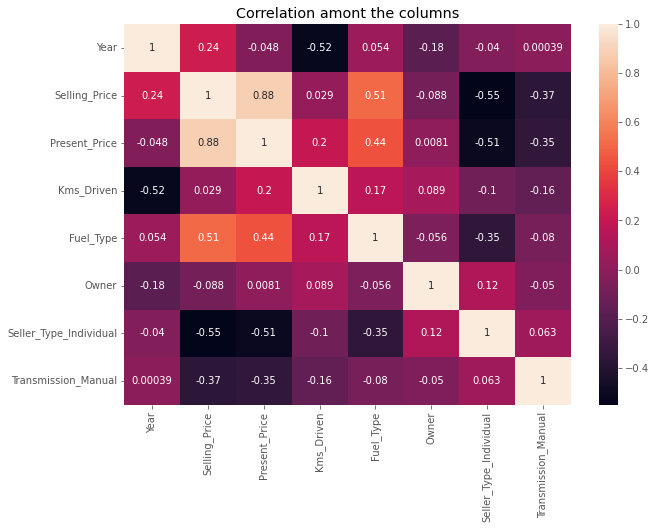

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cardata.corr(), annot=True)
plt.title('Correlation amont the columns')

<AxesSubplot:title={'center':'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

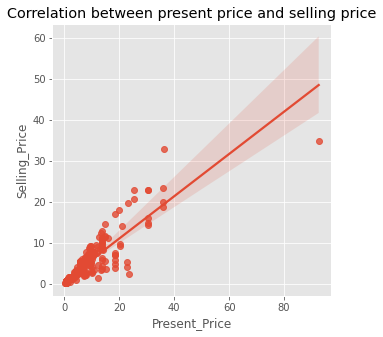

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=cardata)

In [ ]:
x =cardata.drop(['Car_Name', 'Selling_Price'], axis=1)
y= cardata['Selling_Price']
print('shape of X is: ', x.shape)
print('shape of Y is: ', y.shape )

shape of X is:  (301, 7)
shape of Y is:  (301,)


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
print('X_Test Shape : ', x_test.shape)
print('X_Train Shape : ', x_train.shape )
print('Y_Test Shape : ', y_test.shape )
print('Y_Train Shape : ', y_train.shape )

X_Test Shape :  (91, 7)
X_Train Shape :  (210, 7)
Y_Test Shape :  (91,)
Y_Train Shape :  (210,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("MAE: ",(metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 Score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.258140470647337
MSE:  3.493286026225147
R2 Score:  0.8294933369778817


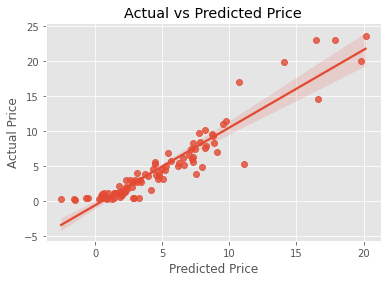

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()